Assignment 2: Text classification for Sentimental analysis using KNN. (Refer any dataset like Titanic,
Twitter, etc.)

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


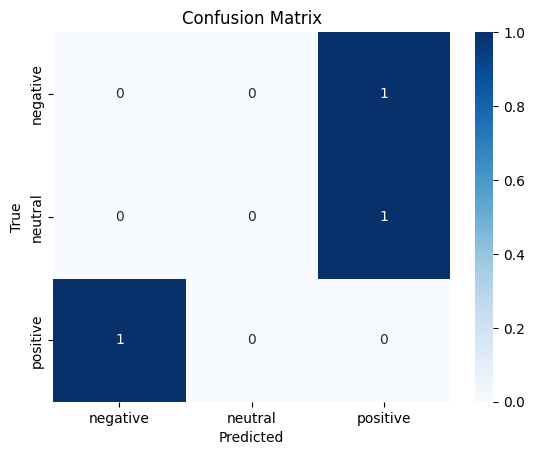

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a simple sentiment dataset
data = {
    'text': [
        "I love this product!",
        "This is the worst experience I've ever had.",
        "Amazing quality and fast delivery.",
        "I hate the customer service.",
        "Pretty decent, nothing special.",
        "Very satisfied with my purchase.",
        "This was a terrible idea.",
        "I'm not sure how I feel about this.",
        "Best thing I've bought this year!",
        "It doesn't work as expected."
    ],
    'sentiment': [
        'positive',
        'negative',
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocessing - Encode labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Step 3: Split data into features (X) and labels (y)
X = df['text']
y = df['sentiment_encoded']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Text Vectorization (using simple count vectorizer here for illustration)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_vec, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test_vec)

# Step 8: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
